In [9]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
df = pd.read_excel('12monthsnew data.xls',sheetname='data to use',index_col='Date')

In [11]:
df = df.dropna()

In [12]:
df.columns = ['Rate','Return']

In [13]:
df_forecast = df.loc['20160101':'20171231',:]

In [14]:
df = df.loc['20100101':'20151231',:]

In [15]:
len(df_forecast)

461

In [16]:
df.to_excel('Results/in-sample.xls')

Forecast

Use p=0, q=1

In [17]:
first_day = 0
forecast_day = len(df)
forecast = []
df = df.append(df_forecast)
last_day = len(df_forecast)

In [18]:
import statsmodels

In [21]:
for i in range(0,last_day):
    in_sample = df.iloc[first_day:forecast_day-1]
    model = statsmodels.tsa.arima_model.ARIMA(in_sample['Return'],order=(0,1,1))
    res = model.fit(maxiter=1000)
    fore = res.forecast(1)[0][0]
    forecast.append(fore)
    first_day = first_day+1
    forecast_day = forecast_day+1

D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check

In [22]:
forecast_data = pd.Series(data=forecast,index=df_forecast.index)
df_forecast = pd.concat([df_forecast,forecast_data],axis=1)

In [23]:
df_forecast.columns=['Rate','Return','Forecast log']

In [24]:
df_forecast['Forecast ARMA'] = np.exp(df_forecast['Forecast log'])*df_forecast['Rate'].shift(1)
df_forecast['Forecast ARMA'].iloc[0] = np.exp(df_forecast['Forecast log'].iloc[0])*df['Rate'].iloc[-1]
MAE_ARMA = np.average(np.abs(df_forecast['Rate']-df_forecast['Forecast ARMA']))
Sum_Square = (df_forecast['Rate']-df_forecast['Forecast ARMA'])**2
RMSE_ARMA = np.sqrt(np.average(Sum_Square))

In [25]:
df_forecast['Naive'] = df_forecast['Rate'].shift(1)
df_forecast['Naive'].iloc[0] = df['Rate'].iloc[-1]
MAE_naive = np.average(np.abs(df_forecast['Rate']-df_forecast['Naive']))
Sum_Square_naive = (df_forecast['Rate']-df_forecast['Naive'])**2
RMSE_naive = np.sqrt(np.average(Sum_Square_naive))

In [27]:
MAE_ARMA

0.0081646347443477367

In [28]:
RMSE_ARMA

0.033460632630809152

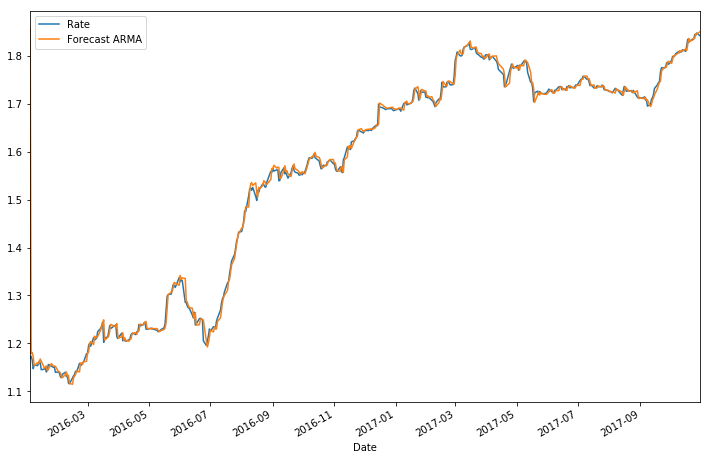

In [26]:
df_forecast[['Rate','Forecast ARMA']].plot(figsize=(12,8))

<h1>ARMA-GARCH

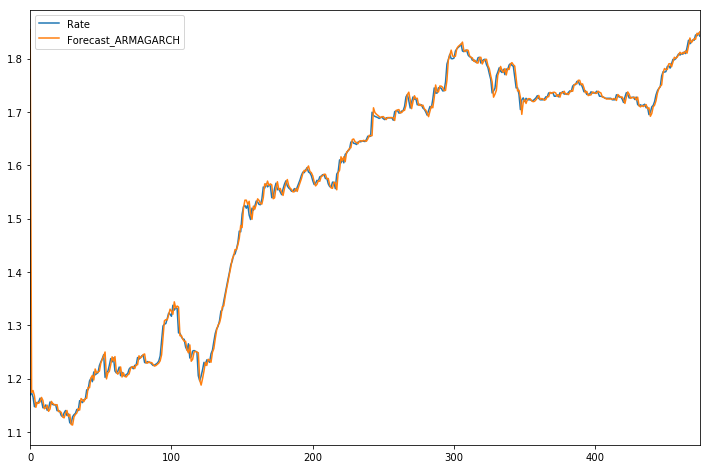

In [80]:
df_armagarch = pd.read_excel('Results\Forecast.xls',index_col='Date')
df_armagarch['Forecast_ARMAGARCH'] = np.exp(df_armagarch['Forecast'])*df_armagarch['Rate'].shift(1)
df_armagarch['Forecast_ARMAGARCH'].iloc[0] = np.exp(df_armagarch['Forecast'].iloc[0])*df['Rate'].iloc[-1]
df_forecast = df_forecast.merge(pd.DataFrame(df_armagarch),how='left')
df_forecast.drop('Forecast',axis=1,inplace=True)
df_forecast.drop('Residuals',axis=1,inplace=True)
df_forecast.to_excel('Results/Prediction 2009 (model 2007-2008).xls')
MAE_ag = np.average(np.abs(df_forecast['Rate']-df_forecast['Forecast_ARMAGARCH']))
Sum_Square_ag = (df_forecast['Rate']-df_forecast['Forecast_ARMAGARCH'])**2
RMSE_ag = np.sqrt(np.average(Sum_Square_ag))
df_forecast[['Rate','Forecast_ARMAGARCH']].plot(figsize=(12,8))

<h1>Forecast Result

In [81]:
title = ['Naive','ARMA','ARMA-Garch']
obs = [str(len(df_forecast)),str(len(df_forecast)),str(len(df_forecast))]
no1 = [RMSE_naive,RMSE_ARMA,RMSE_ag]
no2 = [MAE_naive,MAE_ARMA,MAE_ag]
result = pd.DataFrame(np.transpose([obs,no1,no2]),index=title,columns=['Number of Observations','RMSE','MAE'])
result.to_excel('Results/Forecast_Result.xls')